In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd

In [14]:
def run_naive_bayes(X, Y, threshold=0.8):
    
    model = OneVsRestClassifier(MultinomialNB())

    # predict probabilities 
    Y_pred_prob = cross_val_predict(model, X, Y, cv=5, method="predict_proba")

    # apply threshold to probabilities 
    Y_pred = (Y_pred_prob > threshold).astype(int)

    return Y_pred, Y_pred_prob


def evaluate(Y_true, Y_pred):
    f1_micro = f1_score(Y_true, Y_pred, average="micro")
    print("F1-micro:", f1_micro)
    return f1_micro

 
def run_experiment(X, Y, mlb, threshold=0.8):

    Y_pred, Y_prob = run_naive_bayes(X, Y, threshold)

    f1_micro = f1_score(Y, Y_pred, average="micro")
    print("F1-micro:", f1_micro)

    print(f"\nPer-genre metrics (threshold={threshold}):")
    
    for i, genre in enumerate(mlb.classes_):
        y_true = Y[:, i]
        y_pred = Y_pred[:, i]
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)

        print(f"{genre:20} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f} | Accuracy: {acc:.3f}")
    
    return Y_pred, Y_prob


In [8]:
import pickle

with open("vars.pkl", "rb") as f:
    data = pickle.load(f)

X1 = data["X1"]
X2 = data["X2"]

Y1 = data["Y1"]
Y2 = data["Y2"]

In [9]:
print(X1.shape)
print(Y1.shape)

(6334, 50007)
(6334, 10)


In [15]:
# fitting it again here 
first = pd.read_parquet("cleaned_data_first.parquet")

mlb = MultiLabelBinarizer()
genre_labels = mlb.fit_transform(first["genre"]) # same for both first and last since same data 

print("first 1000 sentences: ")
run_experiment(X1, Y1, mlb)

print("last 1000 sentences: ")
run_experiment(X2, Y2, mlb)

first 1000 sentences: 
F1-micro: 0.457070416042411

Per-genre metrics (threshold=0.8):
adult                | Precision: 0.106 | Recall: 0.018 | F1: 0.031 | Accuracy: 0.834
adventure            | Precision: 0.088 | Recall: 0.010 | F1: 0.018 | Accuracy: 0.826
childrens            | Precision: 0.278 | Recall: 0.051 | F1: 0.085 | Accuracy: 0.831
classics             | Precision: 0.651 | Recall: 0.901 | F1: 0.756 | Accuracy: 0.636
fantasy              | Precision: 0.250 | Recall: 0.043 | F1: 0.073 | Accuracy: 0.801
historical-fiction   | Precision: 0.565 | Recall: 0.692 | F1: 0.622 | Accuracy: 0.598
literary-fiction     | Precision: 0.171 | Recall: 0.018 | F1: 0.032 | Accuracy: 0.829
mystery              | Precision: 0.116 | Recall: 0.025 | F1: 0.042 | Accuracy: 0.841
romance              | Precision: 0.430 | Recall: 0.022 | F1: 0.042 | Accuracy: 0.733
science-fiction      | Precision: 0.337 | Recall: 0.090 | F1: 0.142 | Accuracy: 0.841
last 1000 sentences: 
F1-micro: 0.451527740031836

Pe

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[2.64186469e-20, 1.18615812e-15, 8.95093857e-18, ...,
         1.39382811e-22, 1.40497646e-08, 1.38960659e-23],
        [3.25324811e-46, 6.67196376e-36, 2.19513579e-40, ...,
         4.94766349e-53, 1.06351002e-17, 1.30981847e-58],
        [3.17122401e-27, 2.49412183e-21, 1.24399808e-23, ...,
         1.17281429e-30, 2.24742417e-10, 4.37227805e-34],
        ...,
        [2.03914233e-42, 3.10979804e-31, 1.48472464e-35, ...,
         1.92053525e-45, 6.94190737e-16, 6.72635838e-51],
        [2.63502616e-22, 1.66160938e-16, 4.96088849e-19, ...,
         8.44479102e-24, 2.25925272e-08, 2.41844771e-26],
        [3.41701648e-23, 1.17690774e-16, 1.18460559e-19, ...,
         8.68575558e-25, 6.99815109e-09, 5.97204197e-27]]))

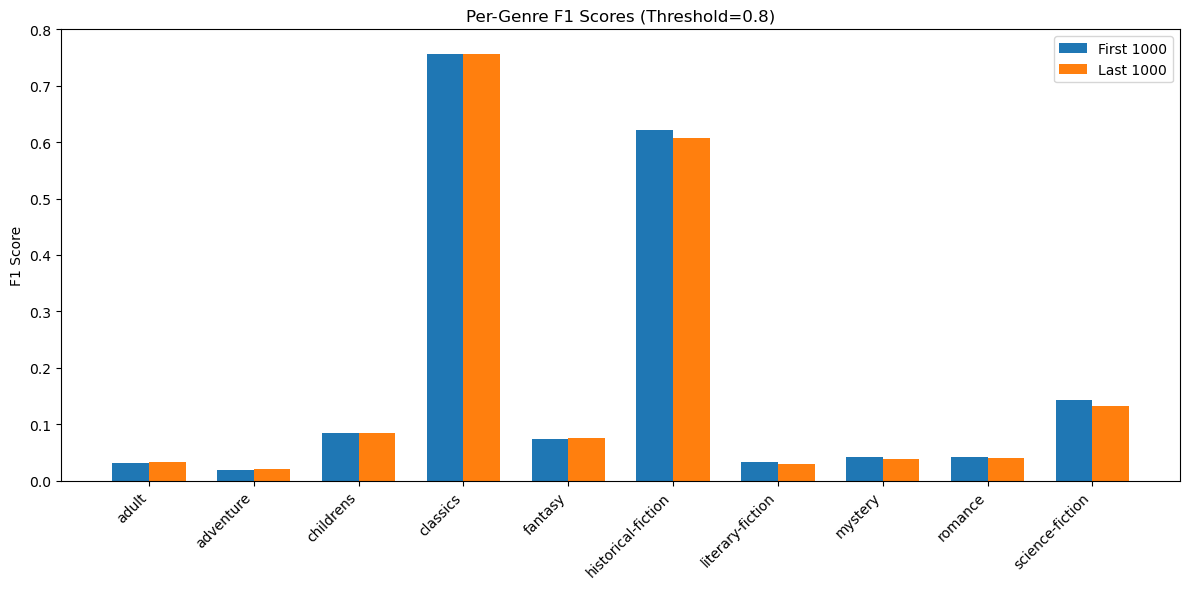

In [16]:
import matplotlib.pyplot as plt

genres = [
    "adult", "adventure", "childrens", "classics", "fantasy",
    "historical-fiction", "literary-fiction", "mystery", "romance", "science-fiction"
]

f1_first = [0.031, 0.018, 0.085, 0.756, 0.073, 0.622, 0.032, 0.042, 0.042, 0.142]
f1_last = [0.033, 0.021, 0.085, 0.756, 0.076, 0.608, 0.030, 0.038, 0.040, 0.133]

df_f1 = pd.DataFrame({
    "Genre": genres,
    "F1 First 1000": f1_first,
    "F1 Last 1000": f1_last
})

# Plot
plt.figure(figsize=(12,6))
x = np.arange(len(genres))
width = 0.35

plt.bar(x - width/2, df_f1["F1 First 1000"], width, label="First 1000")
plt.bar(x + width/2, df_f1["F1 Last 1000"], width, label="Last 1000")

plt.xticks(x, genres, rotation=45, ha='right')
plt.ylabel("F1 Score")
plt.title("Per-Genre F1 Scores (Threshold=0.8)")
plt.ylim(0, 0.8)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
        max_features=50000,     # lab used 10000 i think but we can try 50000 for now
        stop_words="english",
        ngram_range=(1,1),      # only focus on unigrams
    )

word_matrix = tfidf.fit_transform(first["text"])

feature_names = tfidf.get_feature_names_out()

for i, genre in enumerate(mlb.classes_):
    print(f"\n=== Top words for genre: {genre} ===")
    log_probs = model.estimators_[i].coef_[0]
    top_idx = np.argsort(log_probs)[-20:][::-1]

    for idx in top_idx:
        print(f"{feature_names[idx]:<20} {log_probs[idx]:.4f}")


=== Top words for genre: adult ===


AttributeError: 'MultinomialNB' object has no attribute 'coef_'